In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv


In [2]:
img = cv.imread('./images/baboon.png', cv.IMREAD_GRAYSCALE)

In [3]:
# nearest neighbor
def inter_nearest(img, indices):
    # round method
    indices = np.round(indices).astype(int)

    # set zero value
    indices = indices.transpose()
    index = np.where((indices[:, 0] < 0) | (indices[:, 0] >= img.shape[0]) |
                     (indices[:, 1] < 0) | (indices[:, 1] >= img.shape[1]))
    indices[index] = 0

    return img[indices[:, 1], indices[:, 0]]


In [4]:
def inter_bilinear(img, indices):
    x = indices[0, :]
    y = indices[1, :]

    x0 = np.floor(x).astype(int)
    y0 = np.floor(y).astype(int)
    x1 = x0 + 1
    y1 = y0 + 1

    x0 = np.clip(x0, 0, img.shape[1]-1)
    y0 = np.clip(y0, 0, img.shape[0]-1)
    x1 = np.clip(x1, 0, img.shape[1]-1)
    y1 = np.clip(y1, 0, img.shape[0]-1)

    A = (x1-x) * (y1-y) * img[y0, x0]
    B = (x1-x) * (y-y0) * img[y1, x0]
    C = (x-x0) * (y1-y) * img[y0, x1]
    D = (x-x0) * (y-y0) * img[y1, x1]

    return A + B + C + D


In [5]:
def inter_bicubic(img, indices):
    x = indices[0, :]
    y = indices[1, :]


    return img


In [6]:
def warp_perspective(img, M, dsize, inter='nearest'):
    # indices [i, j, 1]
    iY, iX = np.indices(dimensions=dsize)
    indexOutput = np.stack(
        (iX.ravel(), iY.ravel(), np.ones(iY.size))).astype(int)

    # inverse matrix
    IM = np.linalg.inv(M)
    indexInput = IM.dot(indexOutput)
    indexInput /= indexInput[2, :]

    # interpolation type
    if inter == 'nearest':
        out = inter_nearest(img, indexInput)
    elif inter == 'bilinear':
        out = inter_bilinear(img, indexInput)
    elif inter == 'bicubic':
        out = inter_bicubic(img, indexInput)
    else:
        return np.zeros(dsize)

    return out.reshape(dsize)


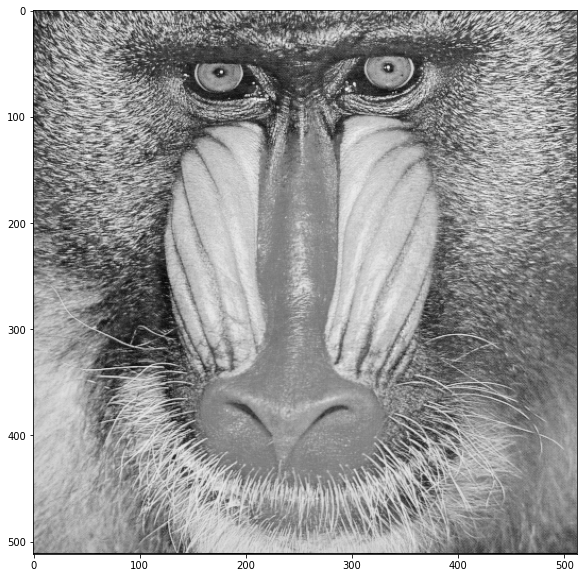

In [7]:
plt.figure(figsize=(10, 10))

tetha = -np.pi / 12
M = np.array([
    [np.cos(tetha), -np.sin(tetha), 0],
    [np.sin(tetha), np.cos(tetha), 0],
    [0, 0, 1]
], dtype='float32')

out = warp_perspective(img, M, (512, 512), 'bicubic')
plt.imshow(out, cmap='gray')
